# Problem 1, Implementing a Neural Net from Scratch

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## A) Adding dataset

In [2]:
training_data = datasets.FashionMNIST(root="data", 
                                      train=True, 
                                      download=True, 
                                      transform=ToTensor())
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor())
labels_dict = {0:"T-shirt",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

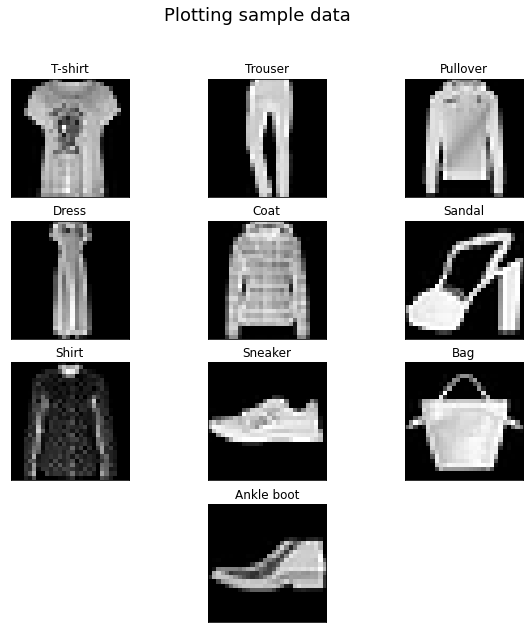

In [3]:
# get data sample
selected_imgs = torch.zeros((10, 1, 28, 28))
dl = DataLoader(training_data, batch_size=1000, shuffle=True)
data_subset = next(iter(dl))
for i in range(10):
    while(1):
        imgs_labels = data_subset[1]
        all_label_i = np.where(imgs_labels == i)[0]
        if len(all_label_i): 
            idx = np.random.choice(all_label_i, 1)
            selected_imgs[i, ...] = data_subset[0][idx].clone()
            break
        else:
            data_subset = next(iter(dl))

# plot sample data
fig, ax = plt.subplots(4, 3, figsize=(10,10))
fig.suptitle("Plotting sample data", fontsize=18)
fig.delaxes(ax[3, 0])
fig.delaxes(ax[3, 2])
for i in range(10):
    ax[i//3,i%3].set_xticks([])
    ax[i//3,i%3].set_yticks([])
    ax[i//3,i%3].imshow(selected_imgs[i, 0], cmap='gray')
    ax[i//3,i%3].set_title(labels_dict[i])
ax[3,1].set_xticks([])
ax[3,1].set_yticks([])
ax[3,1].imshow(selected_imgs[9, 0], cmap='gray')
ax[3,1].set_title(labels_dict[i])
plt.show()

## B) Implementing network

In [81]:
# Layers implementation
class Linear:
    def __init__(self, input_neurons, output_neurons):
        self.n_i = input_neurons
        self.n_o = output_neurons
        # weights and bias intialization
        self.W = torch.rand((self.n_i, self.n_o))*0.001
        self.b = torch.rand((1, self.n_o))*0.001
    def __call__(self, X):
        return X @ self.W + self.b

class ReLU:
    def __call__(self, X):
        X[X <= 0] = 0
        return X

class Softmax():
    def __call__(self, X):
        exp_X = torch.exp(X)
        sum_exp_X = torch.sum(exp_X, axis=1, keepdim=True)
        return exp_X / sum_exp_X

In [84]:
def Model(xb):
    l1 = Linear(28*28, 512)
    r1 = ReLU()
    l2 = Linear(512, 512)
    r2 = ReLU()
    l3 = Linear(512, 10)
    s = Softmax()
    
    # forward calculation
    yb = r1(l1(xb))
    yb = r2(l2(yb))
    yb = l3(yb)
    return yb